# OBLIGATORIO BIG DATA

## Sistema de análisis de información de compañías bajo Big data

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("companies_analysis").getOrCreate()

In [3]:
from pyspark.sql.types import  (StructType, 
                                StructField, 
                                DateType, 
                                BooleanType,
                                DoubleType,
                                IntegerType,
                                StringType,
                               TimestampType)
from pyspark.sql.functions import col, max, min

In [4]:
import seaborn as sns 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings

Creamos el dataframe de compañías

In [5]:
companies = spark.read.csv("companies_sorted.csv", header = True) 

Vemos cuántos registros tiene

In [6]:
print(" The companies dataframe has {} records".format(companies.count()))

 The companies dataframe has 7173438 records


Vemos las columnas

In [7]:
companies.columns

['id',
 'name',
 'domain',
 'year founded',
 'industry',
 'size range',
 'locality',
 'country',
 'linkedin url',
 'current employee estimate',
 'total employee estimate']

In [ ]:
# Casteo de datos

In [9]:
companies.dtypes

[('id', 'string'),
 ('name', 'string'),
 ('domain', 'string'),
 ('year founded', 'string'),
 ('industry', 'string'),
 ('size range', 'string'),
 ('locality', 'string'),
 ('country', 'string'),
 ('linkedin url', 'string'),
 ('current employee estimate', 'string'),
 ('total employee estimate', 'string')]

In [10]:
companies = companies.withColumn('id', (companies.id).cast('Integer'))\
                     .withColumn("year founded", (col("year founded").cast('Integer')))\
                     .withColumn("current employee estimate", (col("current employee estimate").cast('Integer')))\
                     .withColumn("total employee estimate", (col("total employee estimate").cast('Integer')))\


In [11]:
companies.dtypes

[('id', 'int'),
 ('name', 'string'),
 ('domain', 'string'),
 ('year founded', 'int'),
 ('industry', 'string'),
 ('size range', 'string'),
 ('locality', 'string'),
 ('country', 'string'),
 ('linkedin url', 'string'),
 ('current employee estimate', 'int'),
 ('total employee estimate', 'int')]

In [12]:
companies.select("size range").show(10, truncate = False)

+----------+
|size range|
+----------+
|10001+    |
|10001+    |
|10001+    |
|10001+    |
|10001+    |
|10001+    |
|10001+    |
|10001+    |
|10001+    |
|10001+    |
+----------+
only showing top 10 rows



In [13]:
companies.printSchema() #comprobamos los cambios

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- domain: string (nullable = true)
 |-- year founded: integer (nullable = true)
 |-- industry: string (nullable = true)
 |-- size range: string (nullable = true)
 |-- locality: string (nullable = true)
 |-- country: string (nullable = true)
 |-- linkedin url: string (nullable = true)
 |-- current employee estimate: integer (nullable = true)
 |-- total employee estimate: integer (nullable = true)



## Ingeniería de atributos

In [14]:
companies_limited = companies.limit(100000)
companies_pandas = companies_limited.toPandas() #Creamos este dataframe pandas para mejor visualización de datos

In [15]:
companies_pandas.head(10) 

,id,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
0,5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm,274047.0,716906
1,4425416,tata consultancy services,tcs.com,1968.0,information technology and services,10001+,"bombay, maharashtra, india",india,linkedin.com/company/tata-consultancy-services,190771.0,341369
2,21074,accenture,accenture.com,1989.0,information technology and services,10001+,"dublin, dublin, ireland",ireland,linkedin.com/company/accenture,190689.0,455768
3,2309813,us army,goarmy.com,1800.0,military,10001+,"alexandria, virginia, united states",united states,linkedin.com/company/us-army,162163.0,445958
4,1558607,ey,ey.com,1989.0,accounting,10001+,"london, greater london, united kingdom",united kingdom,linkedin.com/company/ernstandyoung,158363.0,428960
5,3844889,hewlett-packard,hpe.com,1939.0,information technology and services,10001+,"palo alto, california, united states",united states,linkedin.com/company/hewlett-packard-enterprise,127952.0,412952
6,2959148,cognizant technology solutions,cognizant.com,1994.0,information technology and services,10001+,"teaneck, new jersey, united states",united states,linkedin.com/company/cognizant,122031.0,210020
7,5944912,walmart,walmartcareers.com,1962.0,retail,10001+,"withee, wisconsin, united states",united states,linkedin.com/company/walmart,120753.0,272827
8,3727010,microsoft,microsoft.com,1975.0,computer software,10001+,"redmond, washington, united states",united states,linkedin.com/company/microsoft,116196.0,276983
9,3300741,at&t,att.com,1876.0,telecommunications,10001+,"dallas, texas, united states",united states,linkedin.com/company/at&t,115188.0,269659


In [16]:
companies_pandas.describe() #vemos la descripción estadística de los datos numéricos

,id,year founded,current employee estimate,total employee estimate
count,1.000000e+05,68765.000000,99996.000000,100000.000000
mean,3.586865e+06,1969.451494,672.194518,1536.867080
std,2.068687e+06,41.859382,2927.811390,7241.805441
min,1.600000e+01,1451.000000,111.000000,112.000000
25%,1.801399e+06,1953.000000,151.000000,314.000000
50%,3.586812e+06,1984.000000,231.000000,516.000000
75%,5.375758e+06,1999.000000,469.000000,1061.000000
max,7.173406e+06,2019.000000,274047.000000,716906.000000


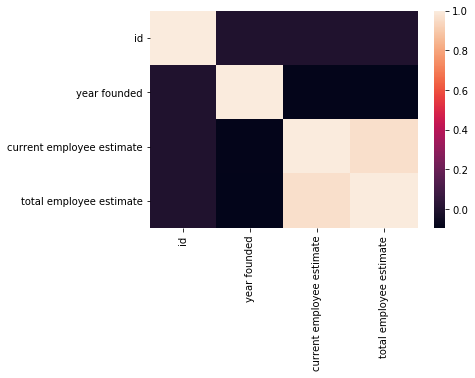

In [17]:
#hacemos un mapa de calor para ver las correlaciones entre los atributos que tenemos
corr = companies_pandas.corr() 
sns.heatmap(corr, 
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values) 

In [18]:
#Otra forma de ver la correlación, no solo con colores sino con los valores de cada correlación.

cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,id,year founded,current employee estimate,total employee estimate
id,1,-0.003,-0.0024,-0.003
year founded,-0.003,1,-0.088,-0.096
current employee estimate,-0.0024,-0.088,1,0.97
total employee estimate,-0.003,-0.096,0.97,1


Vemos que las columnas "total employee estimate" y "current employee estimate" están muy relacionadas. Por lo tanto, nos quedamos solamente con la segunda columna.

In [19]:
companies = companies.drop(col("total employee estimate"))

In [20]:
# También borramos la columna id porque no aporta info
companies = companies.drop(col("id"))

In [21]:
companies.columns

['name',
 'domain',
 'year founded',
 'industry',
 'size range',
 'locality',
 'country',
 'linkedin url',
 'current employee estimate']

## Consultas

In [22]:
# ¿Cuántas industrias existen?

In [23]:
companies.select("industry").distinct().count()

226

In [24]:
companies.select("industry").distinct().show(n = 35)

+--------------------+
|            industry|
+--------------------+
|aviation & aerospace|
|glass, ceramics &...|
|     pharmaceuticals|
|              2013.0|
|recreational faci...|
|     defense & space|
|     broadcast media|
|             fishery|
|          publishing|
|           utilities|
|         breg.com.ua|
|          veterinary|
|        ""pidilite""|
|         think tanks|
|              2006.0|
|          automotive|
|industrial automa...|
|              1996.0|
|packaging and con...|
|     jackieslist.net|
|        law practice|
|              1992.0|
|               dairy|
|         warehousing|
|health, wellness ...|
|railroad manufacture|
|              2004.0|
|           wholesale|
|environmental ser...|
|         real estate|
| program development|
|              2002.0|
|ecpconstrucciones.cl|
|outsourcing/offsh...|
|     law enforcement|
+--------------------+
only showing top 35 rows



In [ ]:
# ¿Cuántos paises tiene el dataset?

In [ ]:
companies.select("country").distinct().count()

In [ ]:
companies.select("country").distinct().show(n = 35)

In [ ]:
# Cantidad de empresas por industria

In [ ]:
companies.groupBy("industry").count().show()

In [ ]:
# DETERMINAR LA INDUSTRIA PRINCIPAL, PARA TODOS LOS PAÍSES

In [ ]:
# País con mas empresas

In [ ]:
companies.groupBy("country").count().show()